<html> <h1 style="font-style:bold; color:blue;"> Neural Computing and Deep Learning </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-6 </h1> </html>

<html> <h2 style="font-style:italic; color:blue;"> RNN for Time Series </h2> </html>


RNNs are used for sequence modelling. This tutorial will look at time series data to be modelled and predicted using RNNs. 

In [4]:
# Import Libraries (pandas, numpy, matplotlib)

# ....
# ...
# ...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Data

We will use retail data for time-series modeling. 

Link to the dataset:
 https://fred.stlouisfed.org/series/MRTSSM448USN

Information about the Advance Monthly Retail Sales Survey can be found on the Census website at:
https://www.census.gov/retail/marts/about_the_surveys.html

Release: Advance Monthly Sales for Retail and Food Services  
Units:  Millions of Dollars, Not Seasonally Adjusted
Frequency:  Monthly

Suggested Citation:
U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, January 25, 2025.



##### Read data first -  Use index_col = 'DATE' and 'parse_dates = True' as a parameter.

_________________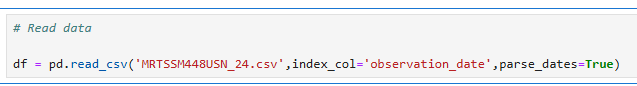

In [8]:
df = pd.read_csv('MRTSSM448USN_24.csv',index_col='observation_date',parse_dates=True)

In [9]:
#pd.read_csv

In [10]:
# Print the first few rows of data
#d
# ...
print(df.head())

                  MRTSSM448USN
observation_date              
1992-01-01                6938
1992-02-01                7524
1992-03-01                8475
1992-04-01                9401
1992-05-01                9558


In [11]:
pd.read_csv

<function pandas.io.parsers.readers.read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols: 'UsecolsArgType' = None, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters: 'Mapping[Hashable, Callable] | None' = None, true_values: 'list | None' = None, false_values: 'list | None' = None, skipinitialspace: 'bool' = False, skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool | lib.NoDefault' = <no_default

_______________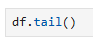

In [13]:
df.tail()

,MRTSSM448USN
observation_date,
2024-08-01,27215
2024-09-01,23088
2024-10-01,25318
2024-11-01,29762
2024-12-01,41199


Does the sales column has any name?

If no, set the name of the colum as 'Sales'.

In [15]:
# Set name of column as 'Sales'. Use - df.columns 

# ...
df.columns=['Sales']
df.tail()

,Sales
observation_date,
2024-08-01,27215
2024-09-01,23088
2024-10-01,25318
2024-11-01,29762
2024-12-01,41199


Plot your data - Year vs Sales

hint: use df.plot  and plt.show()

____________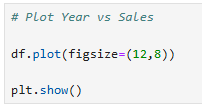

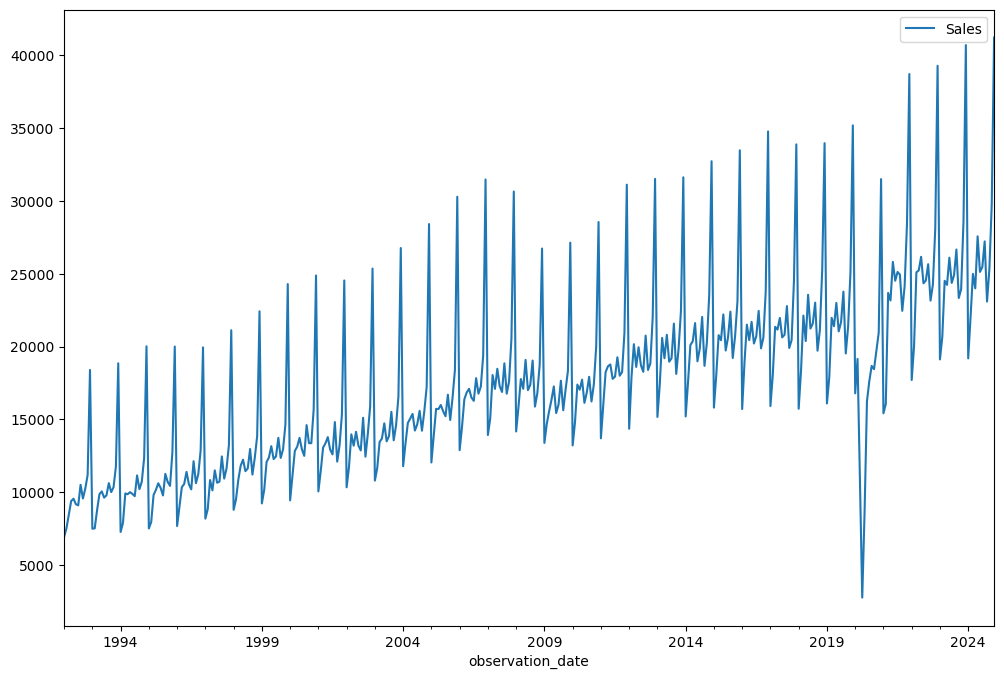

In [18]:
df.plot(figsize=(12,8))
plt.show()

### Train Test Split 

We will use the last 1.5 years (18 months) samples for testing. The rest is for training

______________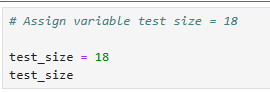

In [21]:
test_size=18
test_size

18

__________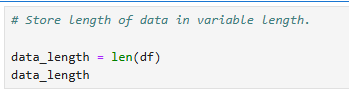

In [23]:
data_length=len(df)
data_length

396

__________________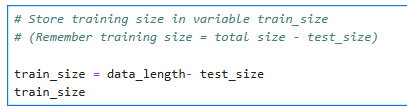

In [25]:
train_size= data_length - test_size
train_size

378

Now, we will find the indexes of the test data. Remember, these are the last 18 indexes in the pandas dataframe.

____________________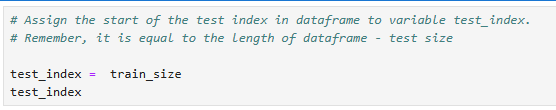

In [28]:
test_index=train_size
test_index

378

Next, we will separate train and test datasets.

_________________________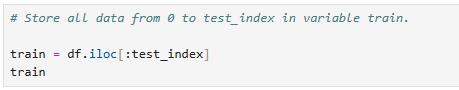

In [31]:
train=df.iloc[:test_index]
train

,Sales
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2023-02-01,20666
2023-03-01,24510
2023-04-01,24232


In [32]:
# Store everything from test_index to the last sample in the test variable 
# Hint - Use df.iloc

# ...
# ...
test = df.iloc[test_index:]
test

,Sales
observation_date,
2023-07-01,24911
2023-08-01,26657
2023-09-01,23332
2023-10-01,23933
2023-11-01,28580
2023-12-01,40684
2024-01-01,19188
2024-02-01,22005
2024-03-01,24986


In [33]:
# Print the size of the train data

# ...

# Print the size of the test data

# ...
print(f"Train data size: {train.size}, Test data size: {test.size}")


Train data size: 378, Test data size: 18


### In Neural Networks, we need to Scale Data between 0-1

___________________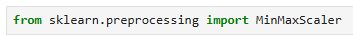

In [36]:
from sklearn.preprocessing import MinMaxScaler

_______________________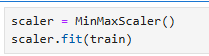

In [38]:
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

__________________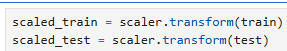

In [40]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [41]:
# Check if the data has been scaled properly
# Print max and min for train and test

# ...
# ...
# ...
# ...
print(scaled_train.max())
print(scaled_test.max ())
print(scaled_train.min())
print(scaled_test.min())

1.0
1.0530599939704552
0.0
0.44980403979499545


## Time Series Generator

This class takes in a sequence of data points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

### We will use 12 months as input and then predict the next month out


_____________________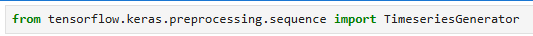

In [45]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [46]:
#TimeseriesGenerator?

_________________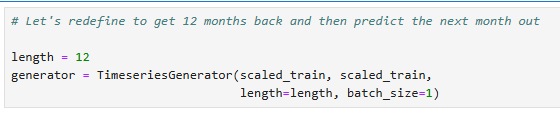

In [48]:
length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train,length=length, batch_size=1)

_______________________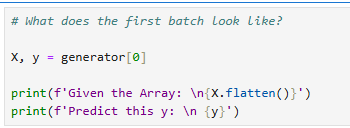

In [50]:
X, y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'predict this y: \n {y}')

Given the Array: 
[0.11406802 0.13012854 0.15619262 0.18157152 0.18587442 0.17556938
 0.17340423 0.21204813 0.18628553 0.20494971 0.23052046 0.42807027]
predict this y: 
 [[0.12952558]]


### Create the Model

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import GRU

import tensorflow as tf

________________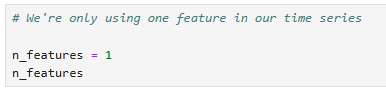

In [55]:
n_features = 1
n_features

1

## Define your own models. 

Use 1. SimpleRNN, LSTM, or GRU neural network.

APIs:
https://keras.io/api/layers/recurrent_layers/

In [57]:
# Your code to create your own model
# use input_shape=(length, n_features)
# use model.add(Dense(1)) because it is the regression task
 
# .....
# .....
# .....
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Your code to create your own model
model = Sequential()
model.add(SimpleRNN(100, activation='relu', input_shape=(length, n_features)))  
model.add(Dense(1))



/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [59]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 100)            │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,301 (40.24 KB)

 Trainable params: 10,301 (40.24 KB)

 Non-trainable params: 0 (0.00 B)

_____________________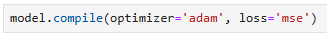

In [61]:
model.compile(optimizer='adam', loss='mse')

### EarlyStopping and creating a Validation Generator

NOTE: The scaled_test dataset size MUST be greater than your length chosen for your batches. 

Review the video on the Week-6 page for more info on this.

<html> <h4 style="font-style:italic; color:blue;"> Just run the 2 next cells using 'Ctrl' + 'Enter' </h4> </html>

In [64]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, 
                                           length=length, batch_size=1)

In [65]:
from tensorflow.keras.callbacks import EarlyStopping

In [66]:
# Your code to create an object early-stop

# Use the patience parameter equal to the last digit in your SID.
# If the last digit of your SID = 0, then assign patience=10
# For example, your SID = 22984879, then patience=9

# LAST_DIGIT_IN_YOUR_SID = 

early_stop = EarlyStopping(monitor='val_loss',patience=8)


_____________________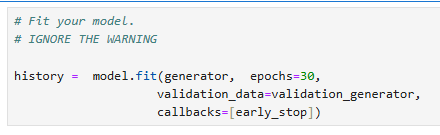

In [68]:
history = model.fit(generator, epochs=30, validation_data=validation_generator, callbacks=[early_stop])


Epoch 1/30


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step - loss: 0.0471 - val_loss: 0.0304
Epoch 2/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - loss: 0.0120 - val_loss: 0.0042
Epoch 3/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - loss: 0.0070 - val_loss: 0.0343
Epoch 4/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - loss: 0.0026 - val_loss: 0.0171
Epoch 5/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 0.0065 - val_loss: 0.0490
Epoch 6/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - loss: 0.0144 - val_loss: 0.0306
Epoch 7/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - loss: 0.0098 - val_loss: 0.0409
Epoch 8/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - loss: 0.0123 - val_loss: 0.0035
Epoch 9/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 0.0040 - val_loss: 0.0040
Epoch 10/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 0.0027 - val_loss: 0.0049
Epoch 11/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - loss: 0.0032 - val_loss: 0.0039
Epoch 12/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 

_____________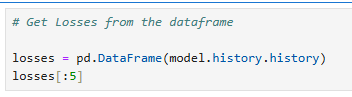

In [70]:
losses = pd.DataFrame(model.history.history)
losses[:5]

,loss,val_loss
0,0.023810,0.030400
1,0.014302,0.004202
2,0.008618,0.034268
3,0.003820,0.017134
4,0.011564,0.048985


In [71]:
# the values may be different


___________________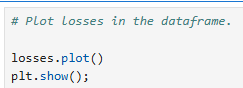

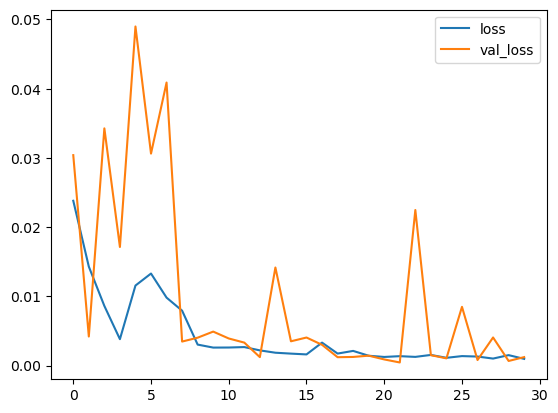

In [73]:
losses.plot()
plt.show();

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

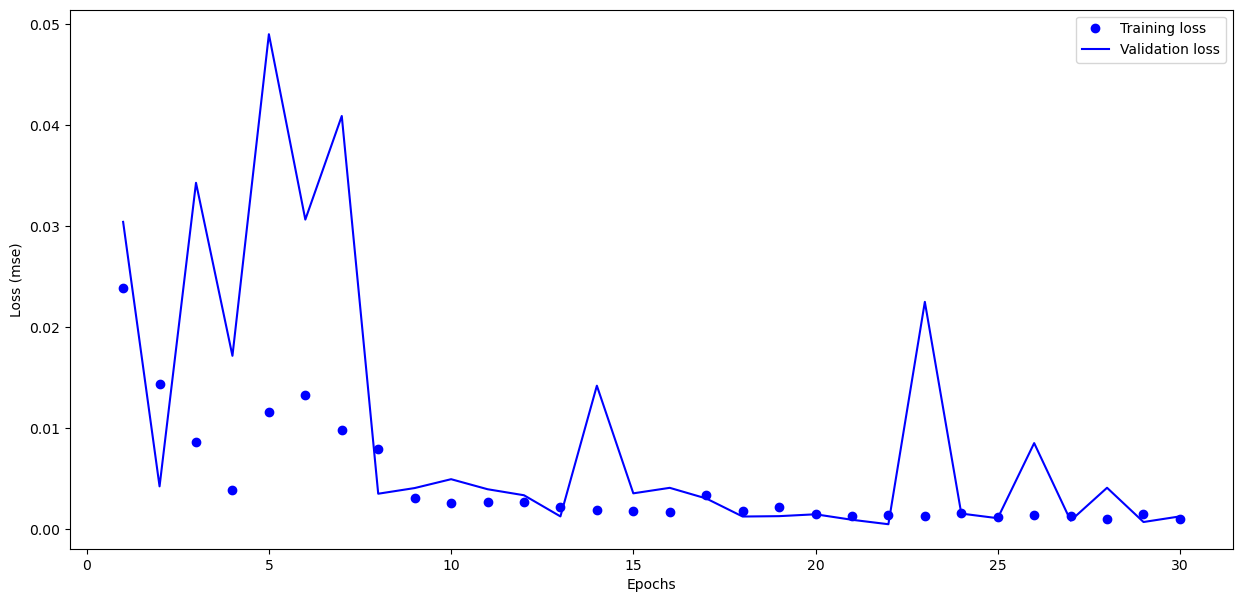

In [75]:
# print Loss for the neural network training process

history_dict = history.history

acc_values = history_dict['loss']
val_acc_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training loss')
plt.plot(epochs, val_acc_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (mse)')
plt.legend()

plt.show()

### Evaluate on Test Data

____________________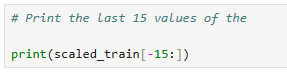

In [78]:
print(scaled_train[-15:])

[[0.61523282]
 [0.64077617]
 [0.5909502 ]
 [0.59621235]
 [0.62693562]
 [0.55844547]
 [0.58834653]
 [0.69254803]
 [1.        ]
 [0.44788555]
 [0.49031162]
 [0.59566421]
 [0.58804506]
 [0.63913175]
 [0.59166278]]


____________________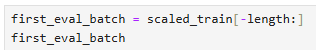

In [80]:
first_eval_batch = scaled_train[-length:]
first_eval_batch

array([[0.59621235],
       [0.62693562],
       [0.55844547],
       [0.58834653],
       [0.69254803],
       [1.        ],
       [0.44788555],
       [0.49031162],
       [0.59566421],
       [0.58804506],
       [0.63913175],
       [0.59166278]])

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [82]:
n_input = 12
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))
first_eval_batch

array([[[0.59621235],
        [0.62693562],
        [0.55844547],
        [0.58834653],
        [0.69254803],
        [1.        ],
        [0.44788555],
        [0.49031162],
        [0.59566421],
        [0.58804506],
        [0.63913175],
        [0.59166278]]])

___________________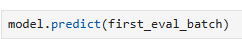

In [84]:
model.predict(first_eval_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[0.60374236]], dtype=float32)

_________________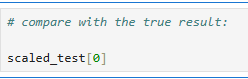

In [86]:
scaled_test[0]

array([0.60665442])

#### Try predicting the series!

<html> <h4 style="font-style:italic; color:blue;"> Just run the 3 next cells using 'Ctrl' + 'Enter' </h4> </html>

In [89]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

current_batch

array([[[0.59621235],
        [0.62693562],
        [0.55844547],
        [0.58834653],
        [0.69254803],
        [1.        ],
        [0.44788555],
        [0.49031162],
        [0.59566421],
        [0.58804506],
        [0.63913175],
        [0.59166278]]])

In [90]:
for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for 
    # grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [91]:
test_predictions

[array([0.60374236], dtype=float32),
 array([0.6336584], dtype=float32),
 array([0.5146253], dtype=float32),
 array([0.54414797], dtype=float32),
 array([0.6169087], dtype=float32),
 array([0.9803008], dtype=float32),
 array([0.3256564], dtype=float32),
 array([0.36544794], dtype=float32),
 array([0.4037648], dtype=float32),
 array([0.34087268], dtype=float32),
 array([0.45607272], dtype=float32),
 array([0.43206036], dtype=float32),
 array([0.4285871], dtype=float32),
 array([0.45114976], dtype=float32),
 array([0.42665282], dtype=float32),
 array([0.45853233], dtype=float32),
 array([0.56312364], dtype=float32),
 array([0.89195395], dtype=float32)]

### Inverse Transformations and Compare

_________________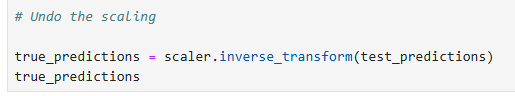

In [94]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[24804.74752831],
       [25896.29437351],
       [21553.13371873],
       [22630.32691908],
       [25285.14879781],
       [38544.23470986],
       [14658.22557878],
       [16110.09892994],
       [17508.16677347],
       [15213.42129931],
       [19416.7252582 ],
       [18540.58638847],
       [18413.85784063],
       [19237.1013543 ],
       [18343.28140387],
       [19506.46924782],
       [23322.69237667],
       [35320.72359705]])

_____________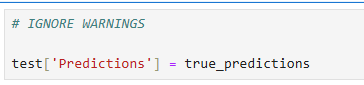

In [96]:
test['predictions'] = true_predictions

/var/folders/wg/pw9q6l614m5fr5qvdtg_y39m0000gn/T/ipykernel_15500/349349345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = true_predictions


### Check and plot predictions

In [98]:
# Print the test variable

# ...
print(test)

                  Sales   predictions
observation_date                     
2023-07-01        24911  24804.747528
2023-08-01        26657  25896.294374
2023-09-01        23332  21553.133719
2023-10-01        23933  22630.326919
2023-11-01        28580  25285.148798
2023-12-01        40684  38544.234710
2024-01-01        19188  14658.225579
2024-02-01        22005  16110.098930
2024-03-01        24986  17508.166773
2024-04-01        23993  15213.421299
2024-05-01        27562  19416.725258
2024-06-01        25121  18540.586388
2024-07-01        25453  18413.857841
2024-08-01        27215  19237.101354
2024-09-01        23088  18343.281404
2024-10-01        25318  19506.469248
2024-11-01        29762  23322.692377
2024-12-01        41199  35320.723597


_______________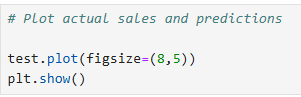

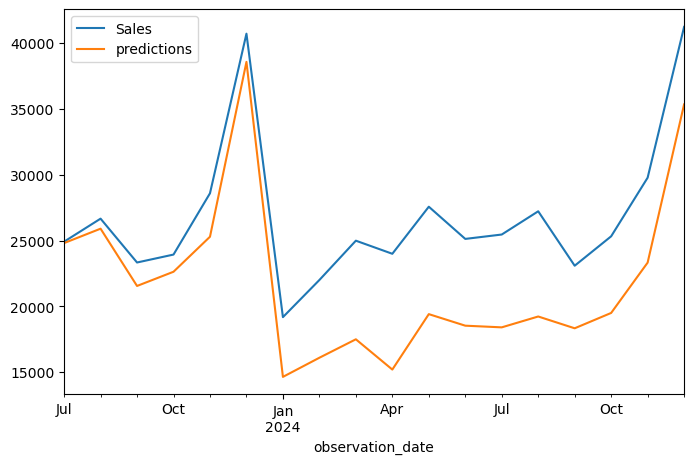

In [100]:
test.plot(figsize=(8,5))
plt.show()

### Retrain and Forecasting

<html> <h4 style="font-style:italic; color:blue;"> Just run the 3 next cells using 'Ctrl' + 'Enter' </h4> </html>

In [103]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [104]:
print(scaled_full_data.max())
print(scaled_full_data.min())

1.0
0.0


In [105]:
length = 12 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, 
                                scaled_full_data, length=length, batch_size=1)

In [106]:
# Use any neural network model based on RNN
# You can also use the model created above
#
# Create the model

# ...
# ...
# ...
model = Sequential()
model.add(SimpleRNN(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 100)            │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,301 (40.24 KB)

 Trainable params: 10,301 (40.24 KB)

 Non-trainable params: 0 (0.00 B)

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [108]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 100)            │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,301 (40.24 KB)

 Trainable params: 10,301 (40.24 KB)

 Non-trainable params: 0 (0.00 B)

In [109]:
# your code to compile the model

# ... 
model.compile(optimizer='adam', loss='mean_squared_error')

In [110]:
model.compile(optimizer='adam', loss='mse')

In [111]:
# Your code to create an object early-stop

# Use the patience parameter equal to the last digit in your SID.
# If the last digit of your SID = 0, then assign patience=10
# For example, your SID = 22984879, then patience=9

# LAST_DIGIT_IN_YOUR_SID = 

early_stop = EarlyStopping(monitor='val_loss',patience=8)


____________________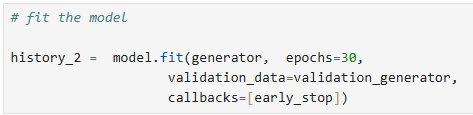

In [113]:
# fit the model

history_2 =  model.fit(generator,  epochs=30,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/30


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - loss: 0.0348 - val_loss: 0.0640
Epoch 2/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - loss: 0.0158 - val_loss: 0.0345
Epoch 3/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - loss: 0.0120 - val_loss: 0.0102
Epoch 4/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - loss: 0.0096 - val_loss: 0.0022
Epoch 5/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - loss: 0.0022 - val_loss: 0.0021
Epoch 6/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - loss: 0.0023 - val_loss: 8.3066e-04
Epoch 7/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - loss: 0.0018 - val_loss: 0.0067
Epoch 8/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - loss: 0.0023 - val_loss: 0.0031
Epoch 9/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - loss: 0.0023 - val_loss: 0.0041
Epoch 10/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 11/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - loss: 0.0011 - val_loss: 0.0031
Epoch 12/30
384/384 ━━━━━━━━━━━━━━━━━

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

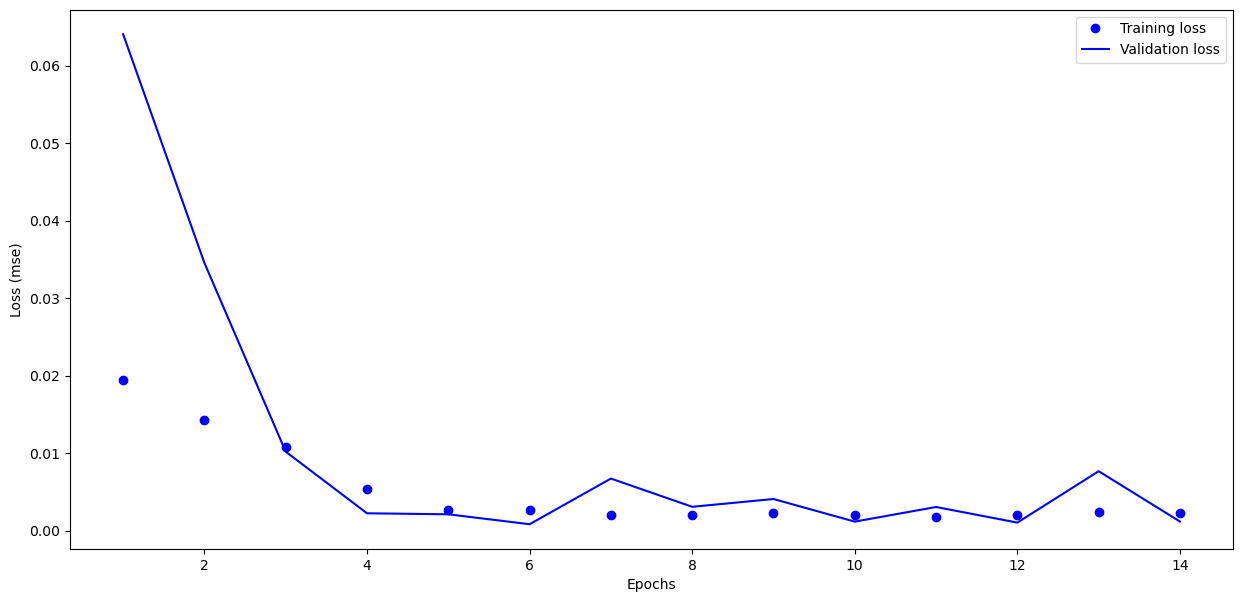

In [115]:
# print Loss for the neural network training process

history_dict = history_2.history

acc_values = history_dict['loss']
val_acc_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training loss')
plt.plot(epochs, val_acc_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (mse)')
plt.legend()

plt.show()

In [116]:
# You can use the code created above to type the next cell code

_________________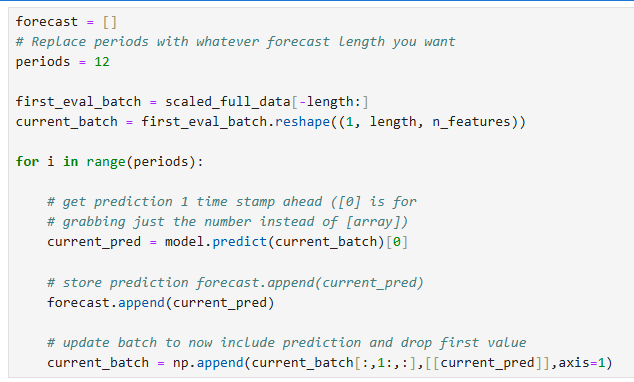

In [118]:
forecast = [] 
periods = 12
first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    current_pred = model.predict(current_batch)[0]
    
   
    forecast.append(current_pred)
    
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


______________________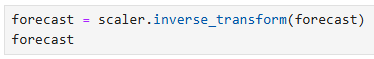

In [120]:
forecast = scaler.inverse_transform(forecast)
forecast

array([[20502.71332821],
       [22535.91473269],
       [24176.77774101],
       [22654.06262815],
       [25152.10790843],
       [22963.71206862],
       [23072.63231027],
       [26020.97100258],
       [21091.938061  ],
       [23159.04125226],
       [25349.30524069],
       [37074.64765608]])

### Creating new timestamp index with pandas.

<html> <h4 style="font-style:italic; color:blue;"> Just run the 4 next cells using 'Ctrl' + 'Enter' </h4> </html>

In [123]:
df

,Sales
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2024-08-01,27215
2024-09-01,23088
2024-10-01,25318


In [124]:
forecast_index = pd.date_range(start='2025-01-01',periods=periods,freq='MS')

In [125]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [126]:
forecast_df

,Forecast
2025-01-01,20502.713328
2025-02-01,22535.914733
2025-03-01,24176.777741
2025-04-01,22654.062628
2025-05-01,25152.107908
2025-06-01,22963.712069
2025-07-01,23072.632310
2025-08-01,26020.971003
2025-09-01,21091.938061
2025-10-01,23159.041252


__________________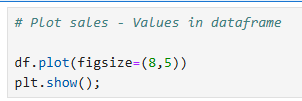

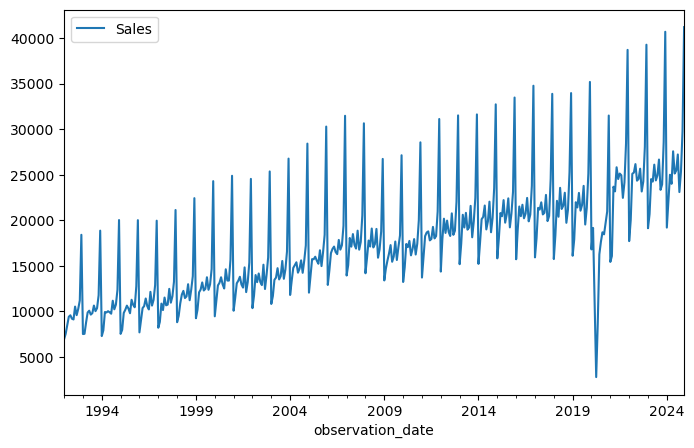

In [128]:
df.plot(figsize=(8,5))
plt.show();

____________________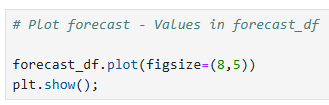

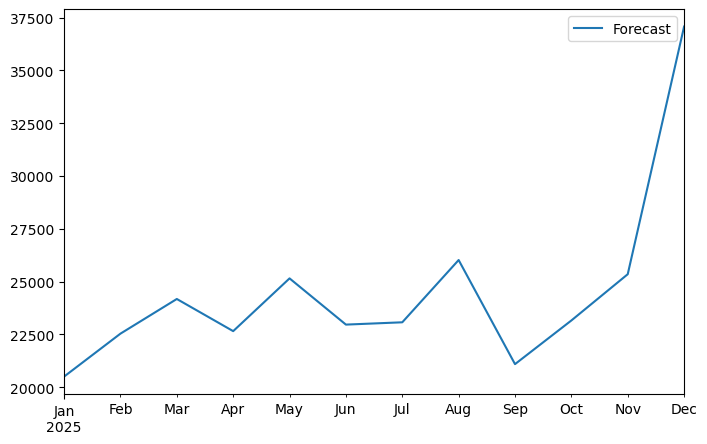

In [130]:
forecast_df.plot(figsize=(8,5))
plt.show();

### Joining pandas plots

https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure

________________________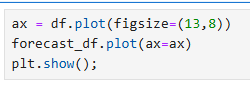

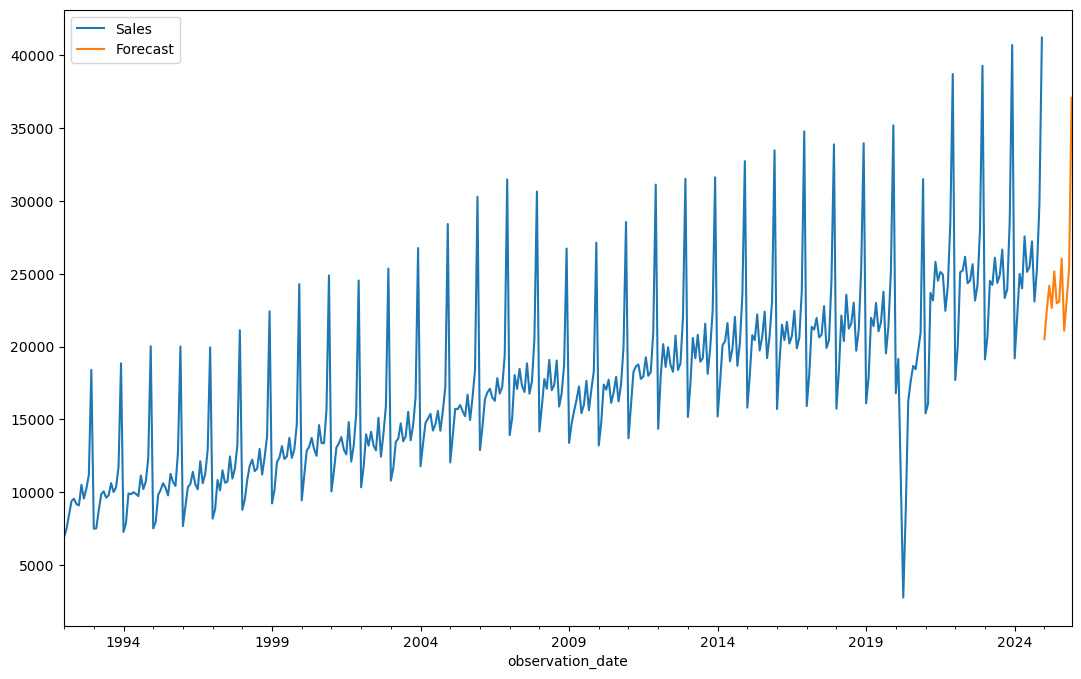

In [133]:
ax = df.plot(figsize=(13,8))
forecast_df.plot(ax=ax)
plt.show();

_______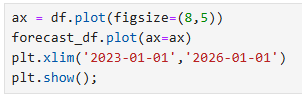

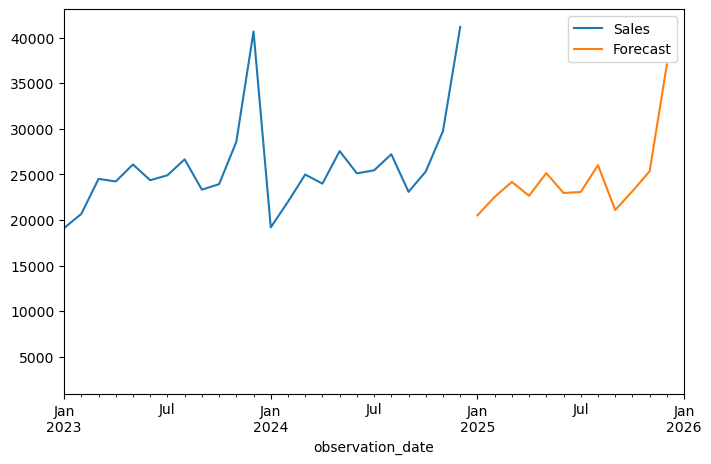

In [135]:
ax = df.plot(figsize=(8,5))
forecast_df.plot(ax=ax)
plt.xlim('2023-01-01','2026-01-01')
plt.show();

### Cecking Forecast for last 12 months

<html> <h4 style="font-style:italic; color:blue;"> Just run the 3 next cells using 'Ctrl' + 'Enter' </h4> </html>

In [138]:
forecast_index = pd.date_range(start='2024-01-01', periods=periods, freq='MS')
forecast_index

DatetimeIndex(['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
               '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [139]:
forecast_df = pd.DataFrame(data=forecast, index=forecast_index,
                           columns=['Forecast'])

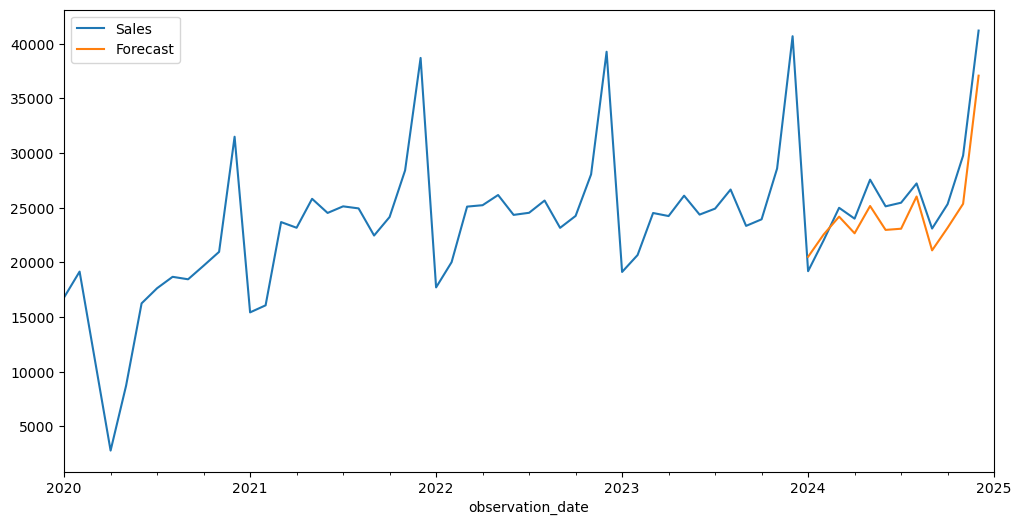

In [140]:
ax = df.plot(figsize=(12,6))
forecast_df.plot(ax=ax)
plt.xlim('2020-01-01','2025-01-01')
plt.show();

<html> <h2 style="font-style:bold; color:red;"> Lab Logbook requirements </h2> </html>

### 1. Plot of the 2nd model's summary

### 2. Copy your early-stop code and history_2 fit-training-process

### 3. Please record the plot of validation and test loss of history_2.

### 4. Based on this analysis, determine the optimal number of epochs for training your model. 

### Try the same example with a LSTM and GRU! (Optional)
Hint: Use LSTM instead of SimpleRNN!